# Micro Session 9: Dashboarding with Python

This session will provide an overview of popular dashboarding and reporting tools, including Plotly’s Dash, Streamlit, Voilà, and Jupyter’s ipywidgets. Participants will learn how to create interactive widgets and controls in Jupyter notebooks and convert their coding files into stand-alone web-based applications using Voilà to share their analysis with teammates and drill down on data sets for better insights.

## Dashboards with Ipywidgets

### <font color = 'blue'> Section 1 - Importing Packages </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

### <font color = 'blue'> Section 2 - Basic Widgets </font>
For a list of all types of widgets available, pleas see:
https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

In [2]:
widgets.IntSlider()

IntSlider(value=0)

In [3]:
w = widgets.IntSlider()
display(w)
#dir(w)

IntSlider(value=0)

In [4]:
w.value

0

In [5]:
w.value = 6

In [6]:
widgets.Text(value='Hello World!', disabled=True)

Text(value='Hello World!', disabled=True)

In [7]:
firstNameBox = widgets.Text(value='Enter your name!', disabled=False)
display(firstNameBox)

print("Good morning ",firstNameBox.value)

Text(value='Enter your name!')

Good morning  Enter your name!


In [8]:
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False,
    indent=False
)

Checkbox(value=False, description='Check me', indent=False)

In [9]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [10]:
drop = widgets.Dropdown(
    options=[('Base Case Scenario', 1), ('Upside', 2), ('Downside', 3)],
    value=2,
    description='Number:',
)
display(drop)

Dropdown(description='Number:', index=1, options=(('Base Case Scenario', 1), ('Upside', 2), ('Downside', 3)), …

In [11]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date')

In [12]:
widgets.Select(
    options=['UKX', 'SPX', 'NKY'],
    value='SPX',
    description='pickIndex',
    disabled=False
)

Select(description='pickIndex', index=1, options=('UKX', 'SPX', 'NKY'), value='SPX')

In [13]:
widgets.RadioButtons(
    options=['UKX', 'SPX', 'NKY'],
    description='pickIndex',
    disabled=False
)

RadioButtons(description='pickIndex', options=('UKX', 'SPX', 'NKY'), value='UKX')

In [14]:
widgets.Dropdown(
    options=['UKX', 'SPX', 'NKY'],
    value='UKX',
    description='pickIndex',
    disabled=False,
)

Dropdown(description='pickIndex', options=('UKX', 'SPX', 'NKY'), value='UKX')

### <font color = 'blue'> Section 3 - Using Interact and Interactive </font>
- interact/interactive are used to link widgets to functions
- the function is being called whenever the widget is being changed by the user
- the interact function "guesses" what type of widget you want to create based on the data type of the argument being passed to the function
- documentation: https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

Below is a summary of how the argument data types are converted to widgets:
- Booleans (True or False) are converted to a Checkbox Widget
- Strings (text) are converted to a Text Widget
- Integers or tuples of integers in the form (min, max) will create IntSlider widgets
- Integers or tuples of floats in the form (min, max) will create FloatSlider widgets
- Lists of text, or numeric values (ints or floats) will create a Dropdown

For any other widget available in the package, the widget needs to be created and cannot be "guessed".

In [15]:
#interact(fnToLinkTo, argument=value)
    #value--> number slider, text textbox, list of data comobobox

def customFn(x):
    #print("Square:", x**2)
    print(x)

interact(customFn,x=10) #generates an IntSlider

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.customFn(x)>

In [16]:
interact(customFn,x="SPX") #generates a Text widget

interactive(children=(Text(value='SPX', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.customFn(x)>

In [17]:
myDatePicker = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

# interact(customFn,x=["SPX","UKX","NKY"]) #generates a Dropdown widget
interact(customFn, x = myDatePicker)

interactive(children=(DatePicker(value=None, description='Pick a Date'), Output()), _dom_classes=('widget-inte…

<function __main__.customFn(x)>

#### @interact
The @ symbol is called a decorator in Python and many packages have the capability of making functions more powerful by placing a "@ function" above a custom function you have created.

In ipywidgets, the @interact can be placed above a function to create that function and also run it at the same time by creating an interactive widget.

In [18]:
@interact
def test(column='Hi', x=5000):
    return column, x

interactive(children=(Text(value='Hi', description='column'), IntSlider(value=5000, description='x', max=15000…

In [19]:
#Following creates a dropdown, intslider, text and checkbox at the same time
@interact
def test(pickIndex=['UKX','SPX','NKY'], x=(100,200), pickTicker="AAPL", show=True):
    return pickIndex, x, pickTicker, show

interactive(children=(Dropdown(description='pickIndex', options=('UKX', 'SPX', 'NKY'), value='UKX'), IntSlider…

### <font color = 'blue'> Section 4 - Interactive Widgets with Graphs and DataFrames </font>

In [20]:
finData = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx", sheet_name="Financing Table Clean")
# finData
# finData['INDUSTRY'].unique()

# finData.sort_values(['INDUSTRY','SIZE'])
finData.sort_values(['INDUSTRY','SIZE'], ascending=[True,False])

# sectors = finData['INDUSTRY'].unique()
# sectors.sort()
# sectors = ['Health Care', 'Real Estate', 'Oil & Gas', 'Finance']
# sectors.sort()
# sectors

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
436,2006-05-07,Tower Automotive Inc,Equity Follow-On Offering,206.250,Auto/Truck,Morgan Stanley
452,2006-05-09,"Regent Communications, Inc.",Equity Follow-On Offering,78.750,Broadcasting,Robertson Stephens
192,2006-03-12,Bayer Corp.,Sr Notes,500.290,Chemicals,Credit Suisse First Boston
292,2006-03-26,Eastman Chemical Company,Sr Notes,400.150,Chemicals,J.P. Morgan
468,2006-05-16,IDEX Corporation,Equity Follow-On Offering,207.000,Chemicals,Merrill Lynch
...,...,...,...,...,...,...
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Utility,J.P. Morgan
498,2006-06-03,PSE&G Energy Holdings Inc.,Notes,135.000,Utility,Lehman Brothers
406,2006-04-24,Duquesne Light Company,Preferred Securities,100.127,Utility,Salomon Smith Barney
200,2006-03-13,Mississippi Power Company,Sr Notes,80.200,Utility,Lehman Brothers


In [21]:
finData.sort_values(['INDUSTRY'])['INDUSTRY'].unique()

# df = finData.sort_values(['INDUSTRY'])
# df['INDUSTRY'].unique()

array(['Auto/Truck', 'Broadcasting', 'Chemicals',
       'Computers & Electronics', 'Construction/Bldg Prods',
       'Consumer Products', 'Defense Contractors', 'Electric Services ',
       'Finance', 'Food & Beverage', 'Foreign Agency', 'Healthcare',
       'Insurance', 'Leisure & Recreation', 'Machinery', 'Metal & Steel',
       'Oil & Gas', 'Paper & Packaging', 'Professional Services',
       'Real Estate', 'Retail', 'Telecommunications', 'Textile',
       'Transportation', 'Utility'], dtype=object)

In [28]:
def sectorPlot(sector):
    filterData = finData[finData['INDUSTRY'] == sector]
    fig = px.bar(filterData, x='TYPE', y='SIZE', color='TYPE', title="Deal Value ($mm) by Type in: " + sector)
    fig.show()

sectorDropDown = widgets.Dropdown(
    options=finData.sort_values(['INDUSTRY'])['INDUSTRY'].unique(),
    value='Finance',
    description='Industry:',
    disabled=False,
)

sectorPick = interact(sectorPlot, sector=sectorDropDown)

interactive(children=(Dropdown(description='Industry:', index=8, options=('Auto/Truck', 'Broadcasting', 'Chemi…

#### Passing widgets to multiple functions
- sometimes you don't want the widgets to get displayed right away and you might want to reuse them for multiple functions
- in the example below if interact is used for the dropdowns, they will get created twice
- instead the widgets can be linked to multiple functions using interactive_output()
    - however, because the widgets are not created right away, the outputs needs to be created in a variable and displayed later

- widgets.interactive_output(function, dict)
    - dict keys are the name of the arguments used in the function, dict values are the passed widgets

In [26]:
#Passing widgets to multiple functions
# from ipywidgets import interactive_output

#Functions
def filterDF(sector, dealType, showAll):
    filterData = finData[(finData['INDUSTRY'] == sector) & (finData['TYPE'] == dealType)]
    if showAll:
        display(finData)
    else:
        display(filterData)

def sumifSize(sector, dealType):
    filterData = finData[(finData['INDUSTRY'] == sector) & (finData['TYPE'] == dealType)]
    total = filterData['SIZE'].sum()
    print("Total size of {} deals in {}: ${:,.1f}".format(dealType, sector, total))

#Widgets
sectorDrop = widgets.Dropdown(
    options=finData['INDUSTRY'].unique(),
    value='Finance',
    description='Industry:',
    disabled=False,
)

typeDrop = widgets.Dropdown(
    options=finData['TYPE'].unique(),
    value='Global Notes',
    description='Type of Deal:',
    disabled=False,
)

showAllCheck = widgets.Checkbox(
    value=False,
    description='Ignore Dropdowns'
)

showPivotCheck = widgets.Checkbox(
    value=False,
    description='Show Pivot Table'
)

#Interact Calls
#totalSize = interact(sumifSize, sector=sectorDrop, dealType=typeDrop)
#sectorPickDF = interact(filterDF, sector=sectorDrop, dealType=typeDrop, showAll = showAllCheck)
# #     #note how the dropdowns appear twice
    
#Using Interact Output
output1 = widgets.interactive_output(sumifSize, {"sector":sectorDrop, "dealType":typeDrop})
output2 = widgets.interactive_output(filterDF, {"sector":sectorDrop, 
                                                "dealType":typeDrop,
                                                "showAll":showAllCheck})

display(sectorDrop, typeDrop, showAllCheck)
display(output1)
display(output2)

Dropdown(description='Industry:', options=('Finance', 'Real Estate', 'Computers & Electronics', 'Utility', 'He…

Dropdown(description='Type of Deal:', options=('Global Notes', 'Initial Public Offering', 'CD Notes', 'Equity …

Checkbox(value=False, description='Ignore Dropdowns')

Output()

Output()

#### Changing the layouts
- widgets.VBox and widgets.HBox allow configurations of the widgets in a vertical or horizontal box

In [25]:
widgets.VBox([widgets.HBox([sectorDrop, typeDrop, showAllCheck]), output1, output2])

### <font color = 'blue'> Section 5 - Creating a Dashboard with Voilà </font>
Voià package helps create a stand-alone dashboard that users can interact with, without seeing the coding cells.

Documentation: https://voila.readthedocs.io/en/latest/?badge=latest

In Jupyter Notebooks a preview can be launched by clicking on the Voila icon once Voila is installed on Anaconda:

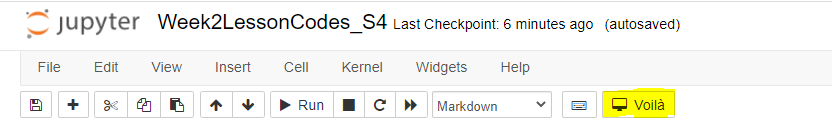

In Jupyter Lab, this can be launched by clicking this icon:

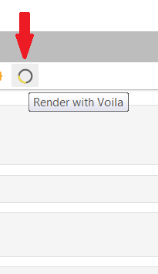

or by searching for voila in the search menu:

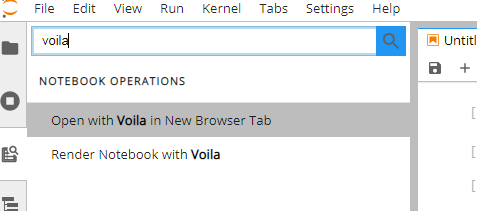
